In [1]:
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
import geopandas as gpd
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import silhouette_score
from geneal.genetic_algorithms import BinaryGenAlgSolver
from geneal.applications.fitness_functions.binary import fitness_functions_binary

In [2]:
data_embeddings = pd.read_csv('data_for_cluster-21-Aug.csv')

In [3]:
data_embeddings.set_index(data_embeddings['departamento'], drop=True,inplace=True)
data_embeddings = data_embeddings.drop('departamento',1)
data_embeddings.head()

,susceptibles,infectados,recuperados,decesos,cantidad_mayores_65,ipm,poblacion_total,personas_km2,edad_promedio,promedio_morbilidades,...,humedad_relativa,% DE PERSONAS EN EL DEPARTAMENTO,% DE HOMBRES EN EL DEPARTAMENTO,% DE MUJERES EN EL DEPARTAMENTO,% DE PERSONAS EN EL DEPARTAMENTO15_64,% DE HOMBRES EN EL DEPARTAMENTO15_64,% DE MUJERES EN EL DEPARTAMENTO15_64,% DE PERSONAS EN EL DEPARTAMENTO64_,% DE HOMBRES EN EL DEPARTAMENTO64_,% DE MUJERES EN EL DEPARTAMENTO64_
departamento,,,,,,,,,,,,,,,,,,,,,
amazonas,73529.0,1.0,1.0,0.0,2791,81.690909,78830.0,0.719,25.420,2435.250000,...,86.878081,35.34,18.15,17.19,60.38,31.80,28.58,4.28,2.16,2.12
antioquia,6572804.0,1279.0,38.0,9.0,576614,37.586400,6690977.0,105.184,34.628,779755.333333,...,83.389164,19.72,10.09,9.62,70.53,34.01,36.52,9.76,4.19,5.56
arauca,269521.0,1.0,0.0,0.0,13880,44.457143,270708.0,11.366,29.092,13375.583333,...,82.222732,28.25,14.45,13.80,65.90,33.07,32.83,5.85,3.03,2.82
atlantico,2426387.0,195.0,35.0,2.0,196909,37.326087,2546138.0,751.517,32.435,306515.916667,...,80.665914,23.77,12.13,11.63,67.80,32.92,34.88,8.43,3.63,4.80
bogota,7874294.0,2235.0,22.0,19.0,632389,9.000000,8181047.0,5155.039,34.469,659978.250000,...,83.494365,18.57,9.48,9.10,72.56,34.70,37.86,8.86,3.63,5.23


In [4]:
normalized_df = (data_embeddings-data_embeddings.mean())/data_embeddings.std()

In [5]:
normalized_df = normalized_df.fillna(0)

## REDUCCIÓN DE DIMENSIONALIDAD - CLÚSTER

### TODAS LAS VARIABLES

##### -KMEANS

In [6]:
range_n_clusters = np.array(range(2,11))
for n_clus in range_n_clusters:
    clust = KMeans(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.38353188623244416
For n_clusters, k = 3 The average silhouette_score is : 0.24295887907619618
For n_clusters, k = 4 The average silhouette_score is : 0.23817562650049595
For n_clusters, k = 5 The average silhouette_score is : 0.22531290972455464
For n_clusters, k = 6 The average silhouette_score is : 0.23155421459002
For n_clusters, k = 7 The average silhouette_score is : 0.1897884404067569
For n_clusters, k = 8 The average silhouette_score is : 0.1935917231780051
For n_clusters, k = 9 The average silhouette_score is : 0.16217401016848973
For n_clusters, k = 10 The average silhouette_score is : 0.14306314501163775


##### -KMEDOIDS

In [7]:
for n_clus in range_n_clusters:
    clust = KMedoids(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.05010297246487844
For n_clusters, k = 3 The average silhouette_score is : 0.06910062364419942
For n_clusters, k = 4 The average silhouette_score is : 0.06855860555627333
For n_clusters, k = 5 The average silhouette_score is : 0.010209890385729803
For n_clusters, k = 6 The average silhouette_score is : -0.04246371052807137
For n_clusters, k = 7 The average silhouette_score is : 0.09947743402868331
For n_clusters, k = 8 The average silhouette_score is : 0.047384311761636703
For n_clusters, k = 9 The average silhouette_score is : -0.08072950477564479
For n_clusters, k = 10 The average silhouette_score is : -0.10480606781697581


### PCA

In [8]:
for i in range(len(normalized_df.columns)):
    pca = PCA(i)
    pca.fit(normalized_df.values)
    if sum(pca.explained_variance_ratio_) > 0.99:
        break
        
vectors_pca = pca.transform(normalized_df)

##### -KMEANS

In [9]:
len(pca.explained_variance_ratio_) ## número de componentes principales

22

In [10]:
for n_clus in range_n_clusters:
    clust = KMeans(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(vectors_pca)
    silhouette_avg = silhouette_score(vectors_pca, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.3872724900145742
For n_clusters, k = 3 The average silhouette_score is : 0.2465701892116708
For n_clusters, k = 4 The average silhouette_score is : 0.23117261657511975
For n_clusters, k = 5 The average silhouette_score is : 0.22985821118175073
For n_clusters, k = 6 The average silhouette_score is : 0.23647328812111063
For n_clusters, k = 7 The average silhouette_score is : 0.1947476727150633
For n_clusters, k = 8 The average silhouette_score is : 0.1991130254217646
For n_clusters, k = 9 The average silhouette_score is : 0.16758400757052258
For n_clusters, k = 10 The average silhouette_score is : 0.14844749311230584


##### -KMEDOIDS

In [11]:
for n_clus in range_n_clusters:
    clust = KMedoids(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(vectors_pca)
    silhouette_avg = silhouette_score(vectors_pca, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.05166848749693542
For n_clusters, k = 3 The average silhouette_score is : 0.07118020194266635
For n_clusters, k = 4 The average silhouette_score is : 0.07021741884060437
For n_clusters, k = 5 The average silhouette_score is : 0.011832907978828517
For n_clusters, k = 6 The average silhouette_score is : -0.05676912654405442
For n_clusters, k = 7 The average silhouette_score is : 0.1022313534524602
For n_clusters, k = 8 The average silhouette_score is : -0.05129837418814816
For n_clusters, k = 9 The average silhouette_score is : -0.08517666718295547
For n_clusters, k = 10 The average silhouette_score is : -0.11419740770155871


### t-SNE

##### -KMEANS

In [12]:
tsne = TSNE(2, 5)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass perplexity=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [13]:
vectors_tsne = tsne.fit_transform(normalized_df)

In [14]:
for n_clus in range_n_clusters:
    clust = KMeans(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(vectors_tsne)
    silhouette_avg = silhouette_score(vectors_tsne, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.42976758
For n_clusters, k = 3 The average silhouette_score is : 0.51486695
For n_clusters, k = 4 The average silhouette_score is : 0.50759494
For n_clusters, k = 5 The average silhouette_score is : 0.5082441
For n_clusters, k = 6 The average silhouette_score is : 0.49311516
For n_clusters, k = 7 The average silhouette_score is : 0.47969484
For n_clusters, k = 8 The average silhouette_score is : 0.44868287
For n_clusters, k = 9 The average silhouette_score is : 0.45279285
For n_clusters, k = 10 The average silhouette_score is : 0.45118386


##### -KMEDOIDS

In [15]:
for n_clus in range_n_clusters:
    clust = KMedoids(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(vectors_tsne)
    silhouette_avg = silhouette_score(vectors_tsne, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.44896433
For n_clusters, k = 3 The average silhouette_score is : 0.39960954
For n_clusters, k = 4 The average silhouette_score is : 0.42484796
For n_clusters, k = 5 The average silhouette_score is : 0.34802043
For n_clusters, k = 6 The average silhouette_score is : 0.31831467
For n_clusters, k = 7 The average silhouette_score is : 0.33920676
For n_clusters, k = 8 The average silhouette_score is : 0.30661798
For n_clusters, k = 9 The average silhouette_score is : 0.27794883
For n_clusters, k = 10 The average silhouette_score is : 0.2976902


### Stacked autoencoder

In [16]:
original_dimension = normalized_df.shape[1]

In [40]:
original_dimension

80

In [91]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='selu', input_shape=[original_dimension]),
    tf.keras.layers.Dense(10, activation= 'selu')
])
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='selu'),
    tf.keras.layers.Dense(original_dimension, activation='sigmoid')
])

stacked_ae = tf.keras.models.Sequential([encoder, decoder])
stacked_ae.compile(loss = 'mse', optimizer=tf.keras.optimizers.SGD(lr=0.1))

In [92]:
history = stacked_ae.fit(normalized_df, normalized_df, epochs=20)
codings = encoder.predict(normalized_df)

Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
Train on 33 samples
Epoch 1/20
33/33 [==============================] - 0s 2ms/sample - loss: 1.2135
Epoch 2/20
33/33 [==============================] - 0s 121us/sample - loss: 1.2068
Epoch 3/20
33/33 [==============================] - 0s 91us/sample - loss: 1.1960
Epoch 4/20
33/33 [==============================] - 0s 90us/sample - loss: 1.1901
Epoch 5/20
33/33 [==============================] - 0s 121us/sample - loss: 1.1836
Epoch 6/20
33/33 [==============================] - 0s 91us/sample - loss: 1.1773
Epoch 7/20
33/33 [==============================] - 0s 60us/sample - loss: 1.1710
Epoch 8/20
33/33 [==============================] - 0s 121us/sample - loss: 1.1643
Epoch 9/20
33/33 [==============================] - 0s 121us/sample - loss: 1.1563
Epoch 10/20
33/33 [==============================] - 0s 91us/sample - loss: 1.1520
Epo

##### -KMEANS

In [93]:
for n_clus in range_n_clusters:
    clust = KMeans(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(codings)
    silhouette_avg = silhouette_score(codings, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.47631535
For n_clusters, k = 3 The average silhouette_score is : 0.3799254
For n_clusters, k = 4 The average silhouette_score is : 0.394755
For n_clusters, k = 5 The average silhouette_score is : 0.3236511
For n_clusters, k = 6 The average silhouette_score is : 0.31755424
For n_clusters, k = 7 The average silhouette_score is : 0.29257068
For n_clusters, k = 8 The average silhouette_score is : 0.2352526
For n_clusters, k = 9 The average silhouette_score is : 0.22993648
For n_clusters, k = 10 The average silhouette_score is : 0.25624084


##### -KMEDOIDS

In [94]:
for n_clus in range_n_clusters:
    clust = KMedoids(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(codings)
    silhouette_avg = silhouette_score(codings, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.35619774
For n_clusters, k = 3 The average silhouette_score is : 0.35904068
For n_clusters, k = 4 The average silhouette_score is : 0.23133115
For n_clusters, k = 5 The average silhouette_score is : 0.16910362
For n_clusters, k = 6 The average silhouette_score is : 0.19069894
For n_clusters, k = 7 The average silhouette_score is : 0.18648462
For n_clusters, k = 8 The average silhouette_score is : 0.16788584
For n_clusters, k = 9 The average silhouette_score is : 0.12770686
For n_clusters, k = 10 The average silhouette_score is : 0.07705662


### Shared weights autoencoder

In [21]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros",
                                    shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [99]:
dense_1 = tf.keras.layers.Dense(64, activation="selu",input_shape=[original_dimension])
dense_2 = tf.keras.layers.Dense(5, activation="selu")
encoder = tf.keras.models.Sequential([
    dense_1,
    dense_2
])
decoder = tf.keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
])

stacked_ae = tf.keras.models.Sequential([encoder, decoder])
stacked_ae.compile(loss = 'mse', optimizer=tf.keras.optimizers.SGD(lr=0.1))

In [100]:
history = stacked_ae.fit(normalized_df, normalized_df, epochs=80)
codings_1 = encoder.predict(normalized_df)

Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
Train on 33 samples
Epoch 1/80
33/33 [==============================] - 0s 2ms/sample - loss: 1.1844
Epoch 2/80
33/33 [==============================] - 0s 91us/sample - loss: 1.1798
Epoch 3/80
33/33 [==============================] - 0s 121us/sample - loss: 1.1762
Epoch 4/80
33/33 [==============================] - 0s 91us/sample - loss: 1.1729
Epoch 5/80
33/33 [==============================] - 0s 91us/sample - loss: 1.1667
Epoch 6/80
33/33 [==============================] - 0s 151us/sample - loss: 1.1624
Epoch 7/80
33/33 [==============================] - 0s 121us/sample - loss: 1.1492
Epoch 8/80
33/33 [==============================] - 0s 91us/sample - loss: 1.1363
Epoch 9/80
33/33 [==============================] - 0s 91us/sample - loss: 1.1246
Epoch 10/80
33/33 [==============================] - 0s 121us/sample - loss: 1.1139
Epo

##### -KMEANS

In [101]:
for n_clus in range_n_clusters:
    clust = KMeans(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(codings)
    silhouette_avg = silhouette_score(codings, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.47631535
For n_clusters, k = 3 The average silhouette_score is : 0.3799254
For n_clusters, k = 4 The average silhouette_score is : 0.394755
For n_clusters, k = 5 The average silhouette_score is : 0.3236511
For n_clusters, k = 6 The average silhouette_score is : 0.31755424
For n_clusters, k = 7 The average silhouette_score is : 0.29257068
For n_clusters, k = 8 The average silhouette_score is : 0.2352526
For n_clusters, k = 9 The average silhouette_score is : 0.22993648
For n_clusters, k = 10 The average silhouette_score is : 0.25624084


##### -KMEDOIDS

In [102]:
for n_clus in range_n_clusters:
    clust = KMedoids(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(codings)
    silhouette_avg = silhouette_score(codings, cluster_labels)
    print("For n_clusters, k =", n_clus, "The average silhouette_score is :", silhouette_avg)

For n_clusters, k = 2 The average silhouette_score is : 0.35619774
For n_clusters, k = 3 The average silhouette_score is : 0.35904068
For n_clusters, k = 4 The average silhouette_score is : 0.23133115
For n_clusters, k = 5 The average silhouette_score is : 0.16910362
For n_clusters, k = 6 The average silhouette_score is : 0.19069894
For n_clusters, k = 7 The average silhouette_score is : 0.18648462
For n_clusters, k = 8 The average silhouette_score is : 0.16788584
For n_clusters, k = 9 The average silhouette_score is : 0.12770686
For n_clusters, k = 10 The average silhouette_score is : 0.07705662


## INGENIERÍA DE DESCRIPTORES (AG) APLICADO A LO ANTERIOR

### TODAS LAS VARIABLES

##### -KMEANS

Iteration: 10
Best fitness: 0.5830465454031305
Iteration: 20
Best fitness: 0.5935114326629753
Iteration: 30
Best fitness: 0.598674077302463
Iteration: 40
Best fitness: 0.6178813949927785
Iteration: 50
Best fitness: 0.6408955695837912
Iteration: 60
Best fitness: 0.6408955695837912
Iteration: 70
Best fitness: 0.6408955695837912
Iteration: 80
Best fitness: 0.6408955695837912
Iteration: 90
Best fitness: 0.6412990032999
Iteration: 100
Best fitness: 0.6412990032999


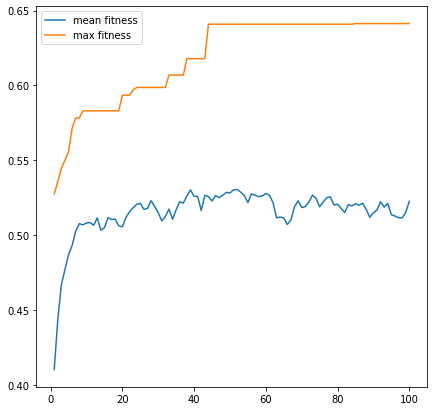


#############################
#			STATS			#
#############################


Total running time: 1 minutes, 49 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.6457570429928255
Best individual: [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0.]
Iteration: 10
Best fitness: 0.34200067644803667
Iteration: 20
Best fitness: 0.36105154434839987
Iteration: 30
Best fitness: 0.3794594844110872
Iteration: 40
Best fitness: 0.40895875920085223
Iteration: 50
Best fitness: 0.41730579018737585
Iteration: 60
Best fitness: 0.41730579018737585
Iteration: 70
Best fitness: 0.42971600316947073
Iteration: 80
Best fitness: 0.42971600316947073
Iteration: 90
Best fitness: 0.42971600316947073
Iteration: 100
Best fitness: 0.42971600316947073

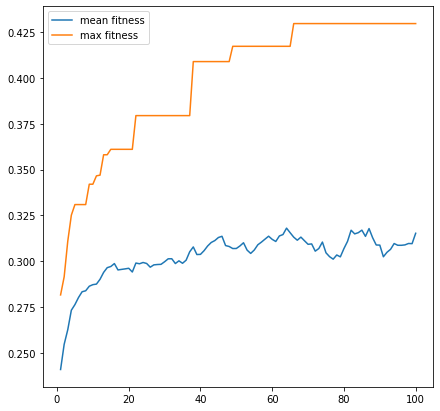


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 6 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.42971600316947073
Best individual: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0.]
Iteration: 10
Best fitness: 0.37619730575079063
Iteration: 20
Best fitness: 0.37619730575079063
Iteration: 30
Best fitness: 0.3798033887163257
Iteration: 40
Best fitness: 0.3798033887163257
Iteration: 50
Best fitness: 0.3798033887163257
Iteration: 60
Best fitness: 0.3870848148635298
Iteration: 70
Best fitness: 0.3870848148635298
Iteration: 80
Best fitness: 0.3870848148635298
Iteration: 90
Best fitness: 0.3870848148635298
Iteration: 100
Best fitness: 0.3870848148635298


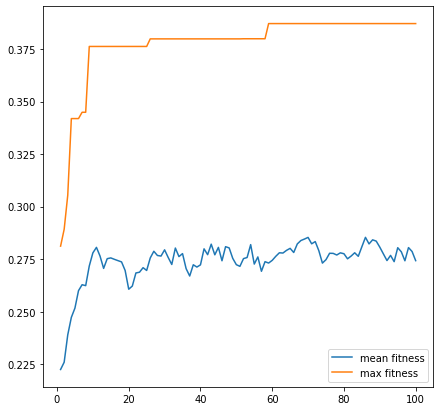


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 17 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.3870848148635298
Best individual: [1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration: 10
Best fitness: 0.34290958073418976
Iteration: 20
Best fitness: 0.3725133122552117
Iteration: 30
Best fitness: 0.37490682933738156
Iteration: 40
Best fitness: 0.37490682933738156
Iteration: 50
Best fitness: 0.37490682933738156
Iteration: 60
Best fitness: 0.38156897046925103
Iteration: 70
Best fitness: 0.38689388290264826
Iteration: 80
Best fitness: 0.38689388290264826
Iteration: 90
Best fitness: 0.3944422154790187
Iteration: 100
Best fitness: 0.3944422154790187


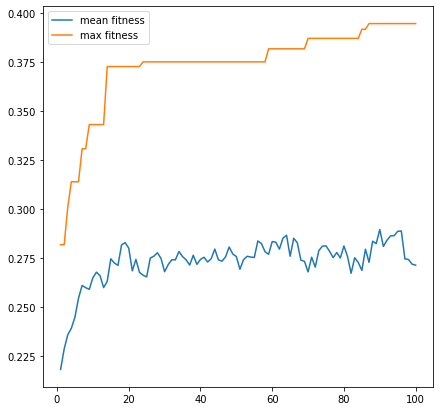


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 36 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.3944422154790187
Best individual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]
Iteration: 10
Best fitness: 0.31975679238329824
Iteration: 20
Best fitness: 0.35528874705322094
Iteration: 30
Best fitness: 0.3595077681530525
Iteration: 40
Best fitness: 0.3595077681530525
Iteration: 50
Best fitness: 0.3665462709522851
Iteration: 60
Best fitness: 0.3817837497602451
Iteration: 70
Best fitness: 0.3817837497602451
Iteration: 80
Best fitness: 0.3817837497602451
Iteration: 90
Best fitness: 0.39105870781147306
Iteration: 100
Best fitness: 0.39105870781147306


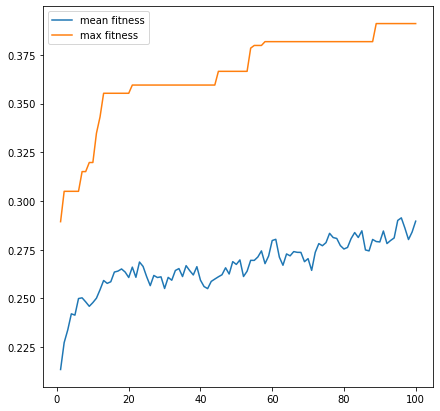


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 55 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.39105870781147306
Best individual: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0.]
Iteration: 10
Best fitness: 0.3260441796612718
Iteration: 20
Best fitness: 0.34740279639587945
Iteration: 30
Best fitness: 0.36934047951600624
Iteration: 40
Best fitness: 0.38532431008263945
Iteration: 50
Best fitness: 0.38532431008263945
Iteration: 60
Best fitness: 0.38532431008263945
Iteration: 70
Best fitness: 0.38532431008263945
Iteration: 80
Best fitness: 0.38532431008263945
Iteration: 90
Best fitness: 0.38532431008263945
Iteration: 100
Best fitness: 0.4270550671483349

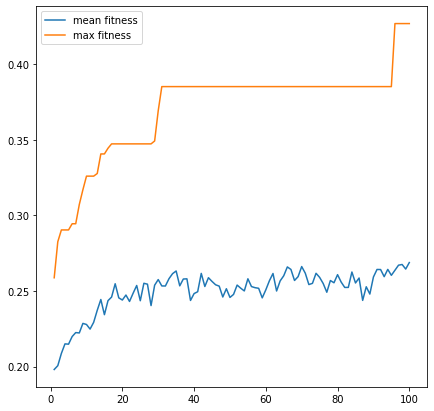


#############################
#			STATS			#
#############################


Total running time: 3 minutes, 1 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.4270550671483349
Best individual: [1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0.]
Iteration: 10
Best fitness: 0.31435109808549255
Iteration: 20
Best fitness: 0.3255236521459656
Iteration: 30
Best fitness: 0.34156087647790095
Iteration: 40
Best fitness: 0.34210829648475577
Iteration: 50
Best fitness: 0.34210829648475577
Iteration: 60
Best fitness: 0.34210829648475577
Iteration: 70
Best fitness: 0.344582939519748
Iteration: 80
Best fitness: 0.35689303538781286
Iteration: 90
Best fitness: 0.36025609608097364
Iteration: 100
Best fitness: 0.36025609608097364


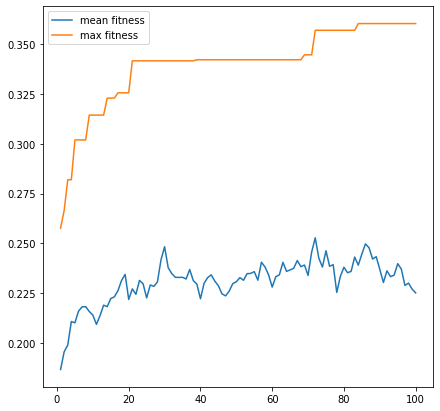


#############################
#			STATS			#
#############################


Total running time: 3 minutes, 23 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.36025609608097364
Best individual: [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]
Iteration: 10
Best fitness: 0.2904138760027786
Iteration: 20
Best fitness: 0.33036056134974595
Iteration: 30
Best fitness: 0.3317341956863675
Iteration: 40
Best fitness: 0.3320083780218852
Iteration: 50
Best fitness: 0.33693428229631583
Iteration: 60
Best fitness: 0.34959794428505314
Iteration: 70
Best fitness: 0.34959794428505314
Iteration: 80
Best fitness: 0.34959794428505314
Iteration: 90
Best fitness: 0.34959794428505314
Iteration: 100
Best fitness: 0.3552995935079189


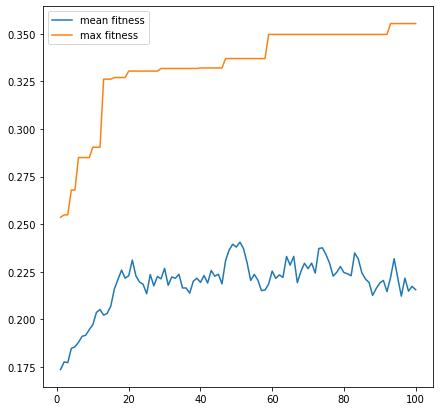


#############################
#			STATS			#
#############################


Total running time: 3 minutes, 39 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.3552995935079189
Best individual: [1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0.]
Iteration: 10
Best fitness: 0.25645072195232377
Iteration: 20
Best fitness: 0.2655730933205898
Iteration: 30
Best fitness: 0.30858124210676263
Iteration: 40
Best fitness: 0.30858124210676263
Iteration: 50
Best fitness: 0.30858124210676263
Iteration: 60
Best fitness: 0.3230604251082665
Iteration: 70
Best fitness: 0.32831844998687587
Iteration: 80
Best fitness: 0.3392169634890523
Iteration: 90
Best fitness: 0.3392169634890523
Iteration: 100
Best fitness: 0.34915856658987504


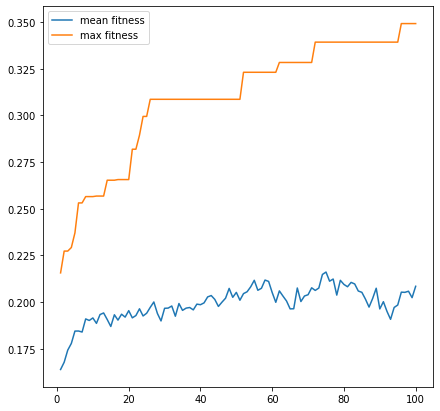


#############################
#			STATS			#
#############################


Total running time: 3 minutes, 54 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.34915856658987504
Best individual: [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(normalized_df.columns))*v_binar[1:len(normalized_df.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = normalized_df.iloc[:,v3]
        else:
            data_df = normalized_df.iloc[:,v2]  
        clust = KMeans(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(normalized_df.columns),
        fitness_function = silh,
        pop_size = 2*len(normalized_df) , # tamaño de la población (número de individuos)
        max_gen = 100 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

##### -KMEDOIDS

Iteration: 10
Best fitness: 0.2848500327806069
Iteration: 20
Best fitness: 0.3049421400375905
Iteration: 30
Best fitness: 0.352472125292179
Iteration: 40
Best fitness: 0.352472125292179
Iteration: 50
Best fitness: 0.35404441303565964
Iteration: 60
Best fitness: 0.44256384899809187
Iteration: 70
Best fitness: 0.47383568458472863
Iteration: 80
Best fitness: 0.47383568458472863
Iteration: 90
Best fitness: 0.519050127723998
Iteration: 100
Best fitness: 0.519050127723998


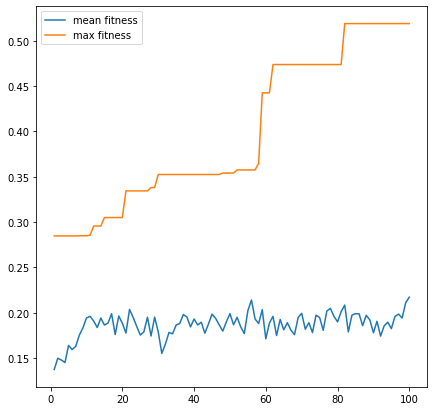


#############################
#			STATS			#
#############################


Total running time: 30 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.519050127723998
Best individual: [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1.]
Iteration: 10
Best fitness: 0.2717944351075479
Iteration: 20
Best fitness: 0.3000488916853634
Iteration: 30
Best fitness: 0.31324288553156865
Iteration: 40
Best fitness: 0.31592723759972446
Iteration: 50
Best fitness: 0.31592723759972446
Iteration: 60
Best fitness: 0.3161148564114747
Iteration: 70
Best fitness: 0.31991828539458567
Iteration: 80
Best fitness: 0.31991828539458567
Iteration: 90
Best fitness: 0.3279974202896606
Iteration: 100
Best fitness: 0.3279974202896606


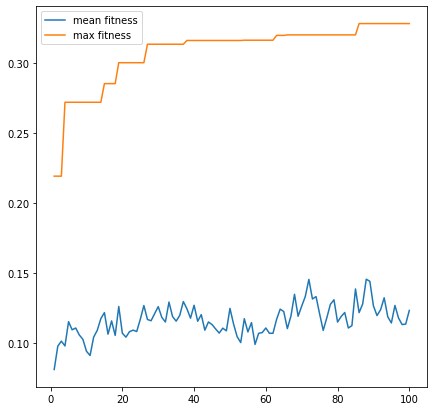


#############################
#			STATS			#
#############################


Total running time: 30 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.3279974202896606
Best individual: [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0.]
Iteration: 10
Best fitness: 0.2929597585446069
Iteration: 20
Best fitness: 0.2929597585446069
Iteration: 30
Best fitness: 0.30008424105582376
Iteration: 40
Best fitness: 0.3142814129417261
Iteration: 50
Best fitness: 0.3142814129417261
Iteration: 60
Best fitness: 0.3273930504426815
Iteration: 70
Best fitness: 0.3273930504426815
Iteration: 80
Best fitness: 0.3273930504426815
Iteration: 90
Best fitness: 0.3273930504426815
Iteration: 100
Best fitness: 0.3437060119074014


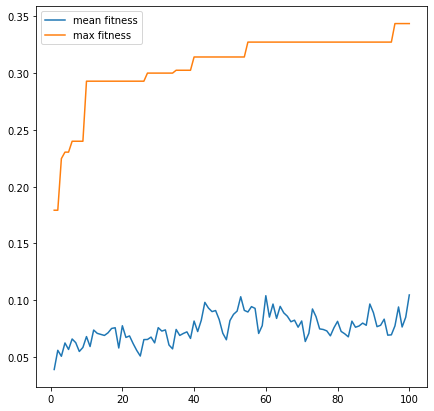


#############################
#			STATS			#
#############################


Total running time: 31 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.3437060119074014
Best individual: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 0.]
Iteration: 10
Best fitness: 0.23630402807727138
Iteration: 20
Best fitness: 0.23630402807727138
Iteration: 30
Best fitness: 0.25905120404688653
Iteration: 40
Best fitness: 0.25905120404688653
Iteration: 50
Best fitness: 0.2723204910362107
Iteration: 60
Best fitness: 0.2723204910362107
Iteration: 70
Best fitness: 0.2723204910362107
Iteration: 80
Best fitness: 0.2819137893811076
Iteration: 90
Best fitness: 0.2819137893811076
Iteration: 100
Best fitness: 0.2819137893811076


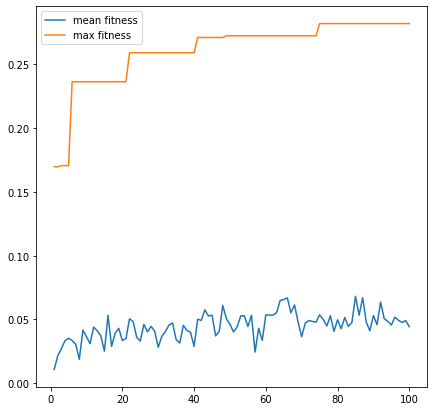


#############################
#			STATS			#
#############################


Total running time: 31 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.2819137893811076
Best individual: [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1.]
Iteration: 10
Best fitness: 0.18493866683869237
Iteration: 20
Best fitness: 0.19257936867786665
Iteration: 30
Best fitness: 0.2255089191374672
Iteration: 40
Best fitness: 0.2255089191374672
Iteration: 50
Best fitness: 0.2255089191374672
Iteration: 60
Best fitness: 0.24105371526729638
Iteration: 70
Best fitness: 0.26102430252108577
Iteration: 80
Best fitness: 0.26102430252108577
Iteration: 90
Best fitness: 0.26102430252108577
Iteration: 100
Best fitness: 0.26102430252108577


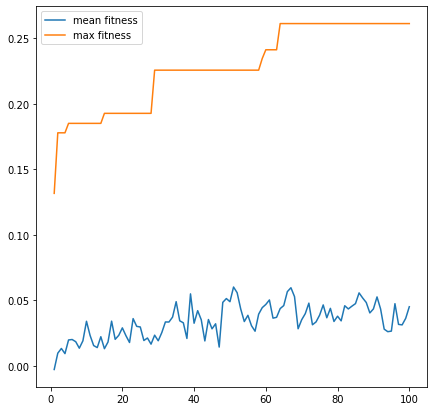


#############################
#			STATS			#
#############################


Total running time: 32 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.26102430252108577
Best individual: [0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1.]
Iteration: 10
Best fitness: 0.1799018873281511
Iteration: 20
Best fitness: 0.18463668827404378
Iteration: 30
Best fitness: 0.21520787858762716
Iteration: 40
Best fitness: 0.23132497468449256
Iteration: 50
Best fitness: 0.23696877909209366
Iteration: 60
Best fitness: 0.25101679142841604
Iteration: 70
Best fitness: 0.25101679142841604
Iteration: 80
Best fitness: 0.25101679142841604
Iteration: 90
Best fitness: 0.25101679142841604
Iteration: 100
Best fitness: 0.25101679142841604


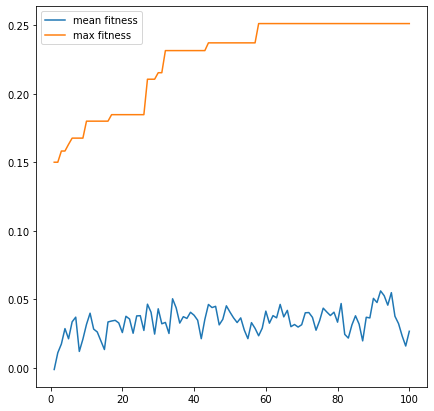


#############################
#			STATS			#
#############################


Total running time: 32 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.25101679142841604
Best individual: [1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1.]
Iteration: 10
Best fitness: 0.17952118031527162
Iteration: 20
Best fitness: 0.17952118031527162
Iteration: 30
Best fitness: 0.18073187392467968
Iteration: 40
Best fitness: 0.19522591552540308
Iteration: 50
Best fitness: 0.19522591552540308
Iteration: 60
Best fitness: 0.19522591552540308
Iteration: 70
Best fitness: 0.2174436047297098
Iteration: 80
Best fitness: 0.2174436047297098
Iteration: 90
Best fitness: 0.2174436047297098
Iteration: 100
Best fitness: 0.2174436047297098


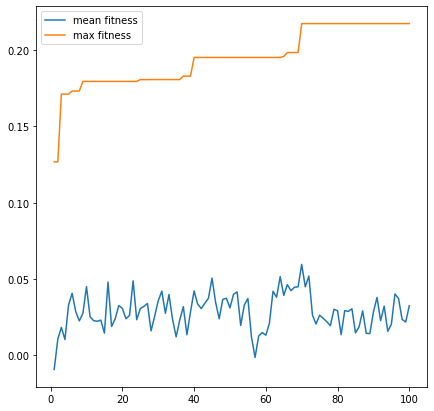


#############################
#			STATS			#
#############################


Total running time: 33 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.2174436047297098
Best individual: [1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0.]
Iteration: 10
Best fitness: 0.14384780178946333
Iteration: 20
Best fitness: 0.19260096017231784
Iteration: 30
Best fitness: 0.21127317863040712
Iteration: 40
Best fitness: 0.21127317863040712
Iteration: 50
Best fitness: 0.21127317863040712
Iteration: 60
Best fitness: 0.21127317863040712
Iteration: 70
Best fitness: 0.22202274376959408
Iteration: 80
Best fitness: 0.22451810620410442
Iteration: 90
Best fitness: 0.22451810620410442
Iteration: 100
Best fitness: 0.23798427469590136


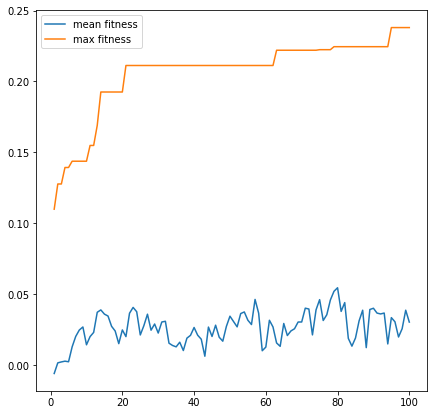


#############################
#			STATS			#
#############################


Total running time: 33 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.23798427469590136
Best individual: [1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 1.]
Iteration: 10
Best fitness: 0.18899865004854
Iteration: 20
Best fitness: 0.18899865004854
Iteration: 30
Best fitness: 0.18899865004854
Iteration: 40
Best fitness: 0.18899865004854
Iteration: 50
Best fitness: 0.18899865004854
Iteration: 60
Best fitness: 0.18899865004854
Iteration: 70
Best fitness: 0.2215753023317379
Iteration: 80
Best fitness: 0.2215753023317379
Iteration: 90
Best fitness: 0.2215753023317379
Iteration: 100
Best fitness: 0.2215753023317379


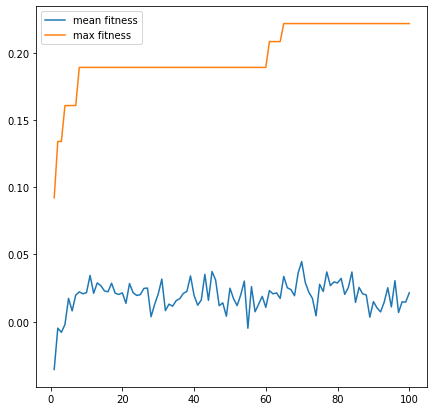


#############################
#			STATS			#
#############################


Total running time: 34 seconds


Population size: 66
Number variables: 80
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.2215753023317379
Best individual: [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1.]


In [46]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(normalized_df.columns))*v_binar[1:len(normalized_df.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = normalized_df.iloc[:,v3]
        else:
            data_df = normalized_df.iloc[:,v2]  
        clust = KMedoids(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(normalized_df.columns),
        fitness_function = silh,
        pop_size = 2*len(normalized_df) , # tamaño de la población (número de individuos)
        max_gen = 100 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

### PCA

##### -KMEANS

In [47]:
pca = pd.DataFrame(vectors_pca) 
len(pca.columns)

22

Iteration: 1
Best fitness: 0.6268765629092262
Iteration: 2
Best fitness: 0.6321369983133451
Iteration: 3
Best fitness: 0.6321369983133451
Iteration: 4
Best fitness: 0.6400712328166726
Iteration: 5
Best fitness: 0.6400712328166726
Iteration: 6
Best fitness: 0.6400712328166726
Iteration: 7
Best fitness: 0.641797984886297
Iteration: 8
Best fitness: 0.6435809872165208
Iteration: 9
Best fitness: 0.6435809872165208
Iteration: 10
Best fitness: 0.6463056120499948


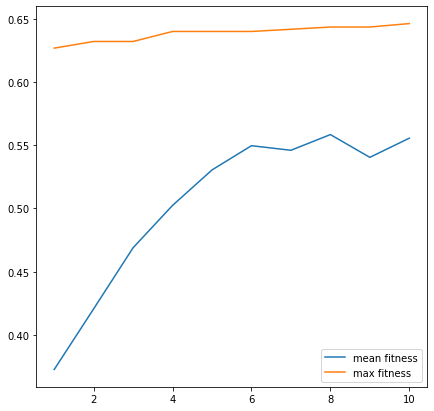


#############################
#			STATS			#
#############################


Total running time: 10 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.6575107021524583
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
Iteration: 1
Best fitness: 0.44560982925274395
Iteration: 2
Best fitness: 0.44560982925274395
Iteration: 3
Best fitness: 0.4521104107518733
Iteration: 4
Best fitness: 0.49002256013142037
Iteration: 5
Best fitness: 0.5032511227425117
Iteration: 6
Best fitness: 0.5130517842845108
Iteration: 7
Best fitness: 0.5226206465766233
Iteration: 8
Best fitness: 0.5226206465766233
Iteration: 9
Best fitness: 0.5226206465766233
Iteration: 10
Best fitness: 0.554810031510592


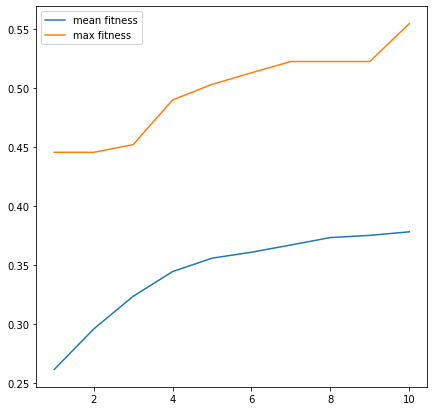


#############################
#			STATS			#
#############################


Total running time: 12 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.554810031510592
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Iteration: 1
Best fitness: 0.4314524352783883
Iteration: 2
Best fitness: 0.4523812887035166
Iteration: 3
Best fitness: 0.4523812887035166
Iteration: 4
Best fitness: 0.4523812887035166
Iteration: 5
Best fitness: 0.4523812887035166
Iteration: 6
Best fitness: 0.4523812887035166
Iteration: 7
Best fitness: 0.4523812887035166
Iteration: 8
Best fitness: 0.4759300563008112
Iteration: 9
Best fitness: 0.5019637342580899
Iteration: 10
Best fitness: 0.5019637342580899


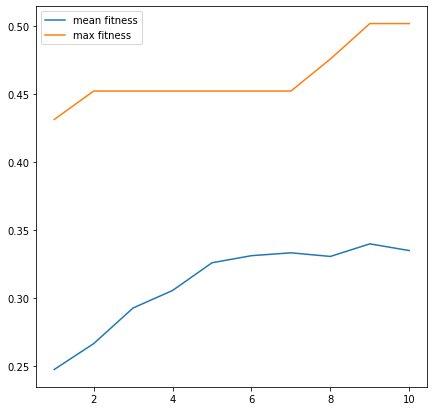


#############################
#			STATS			#
#############################


Total running time: 14 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.5019637342580899
Best individual: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
Iteration: 1
Best fitness: 0.3510683105057073
Iteration: 2
Best fitness: 0.3785940216065859
Iteration: 3
Best fitness: 0.3785940216065859
Iteration: 4
Best fitness: 0.4435874233742376
Iteration: 5
Best fitness: 0.4531856560853325
Iteration: 6
Best fitness: 0.4531856560853325
Iteration: 7
Best fitness: 0.46817905233064316
Iteration: 8
Best fitness: 0.5455356602283886
Iteration: 9
Best fitness: 0.5455356602283886
Iteration: 10
Best fitness: 0.5455356602283886


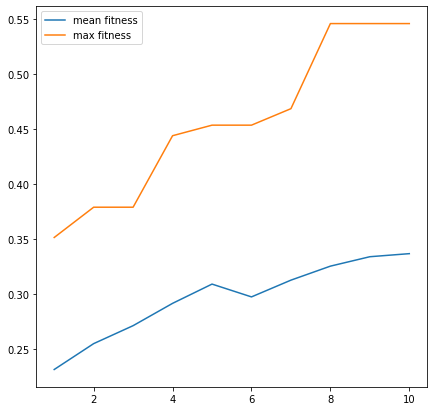


#############################
#			STATS			#
#############################


Total running time: 16 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.549074613101945
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Iteration: 1
Best fitness: 0.4401093309038404
Iteration: 2
Best fitness: 0.4401093309038404
Iteration: 3
Best fitness: 0.4401093309038404
Iteration: 4
Best fitness: 0.4401093309038404
Iteration: 5
Best fitness: 0.4401093309038404
Iteration: 6
Best fitness: 0.4401093309038404
Iteration: 7
Best fitness: 0.4686542787374735
Iteration: 8
Best fitness: 0.48024368848527327
Iteration: 9
Best fitness: 0.5334120868441505
Iteration: 10
Best fitness: 0.5334120868441505


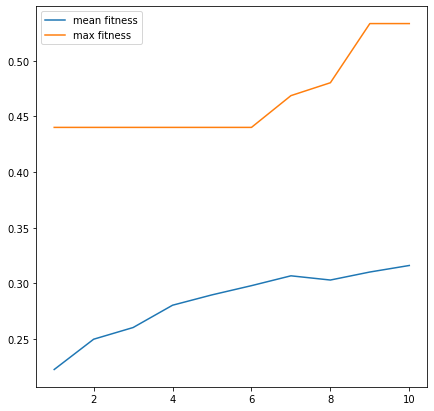


#############################
#			STATS			#
#############################


Total running time: 17 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.5334120868441505
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Iteration: 1
Best fitness: 0.2899900033367528
Iteration: 2
Best fitness: 0.3386672253605269
Iteration: 3
Best fitness: 0.3386672253605269
Iteration: 4
Best fitness: 0.3386672253605269
Iteration: 5
Best fitness: 0.3862614773812588
Iteration: 6
Best fitness: 0.4001478802844627
Iteration: 7
Best fitness: 0.425179573129622
Iteration: 8
Best fitness: 0.425179573129622
Iteration: 9
Best fitness: 0.425179573129622
Iteration: 10
Best fitness: 0.48548643274423164


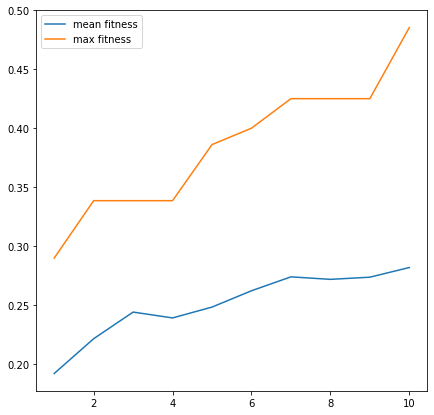


#############################
#			STATS			#
#############################


Total running time: 18 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.5832071521767052
Best individual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration: 1
Best fitness: 0.2899476564665546
Iteration: 2
Best fitness: 0.36532688321440443
Iteration: 3
Best fitness: 0.36532688321440443
Iteration: 4
Best fitness: 0.37016219316665866
Iteration: 5
Best fitness: 0.4221691510486244
Iteration: 6
Best fitness: 0.4529884906759349
Iteration: 7
Best fitness: 0.4529884906759349
Iteration: 8
Best fitness: 0.4529884906759349
Iteration: 9
Best fitness: 0.4529884906759349
Iteration: 10
Best fitness: 0.4529884906759349


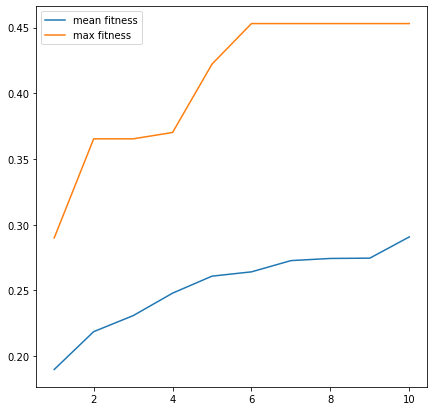


#############################
#			STATS			#
#############################


Total running time: 20 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.4529884906759349
Best individual: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration: 1
Best fitness: 0.30925476001938584
Iteration: 2
Best fitness: 0.32792669799188473
Iteration: 3
Best fitness: 0.3751359330902038
Iteration: 4
Best fitness: 0.3957818892229172
Iteration: 5
Best fitness: 0.4000919884381756
Iteration: 6
Best fitness: 0.4000919884381756
Iteration: 7
Best fitness: 0.4173718538852947
Iteration: 8
Best fitness: 0.4173718538852947
Iteration: 9
Best fitness: 0.46343039128824987
Iteration: 10
Best fitness: 0.46343039128824987


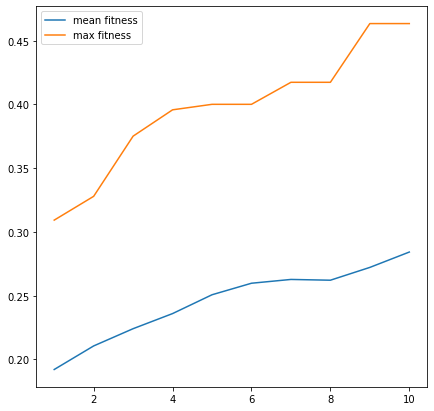


#############################
#			STATS			#
#############################


Total running time: 22 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.46343039128824987
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration: 1
Best fitness: 0.2534685869272674
Iteration: 2
Best fitness: 0.30075962489747216
Iteration: 3
Best fitness: 0.30075962489747216
Iteration: 4
Best fitness: 0.3194225004875546
Iteration: 5
Best fitness: 0.3194225004875546
Iteration: 6
Best fitness: 0.3194225004875546
Iteration: 7
Best fitness: 0.3356544000511879
Iteration: 8
Best fitness: 0.3356544000511879
Iteration: 9
Best fitness: 0.3588557664895904
Iteration: 10
Best fitness: 0.3588557664895904


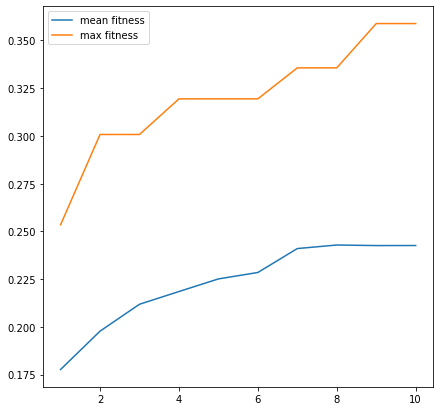


#############################
#			STATS			#
#############################


Total running time: 22 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.3588557664895904
Best individual: [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]


In [87]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(pca.columns))*v_binar[1:len(pca.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = pca.iloc[:,v3]
        else:
            data_df = pca.iloc[:,v2]  
        clust = KMeans(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(pca.columns),
        fitness_function = silh,
        pop_size = 2*len(pca) , # tamaño de la población (número de individuos)
        max_gen = 10 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

In [88]:
nc = 5
def silh(v_binar,n_clus = nc):
    v = range(1,len(pca.columns))*v_binar[1:len(pca.columns)]
    v2 = v[v != 0]
    if v_binar[0] == 1:
        a=np.array(0)
        v3=np.append(a,v2)
        data_df = pca.iloc[:,v3]
    else:
        data_df = pca.iloc[:,v2]  
    clust = KMeans(n_clusters=n_clus, random_state=42)
    cluster_labels = clust.fit_predict(data_df)
    silhouette_avg = silhouette_score(data_df, cluster_labels)
    return(silhouette_avg)

In [89]:
solver = BinaryGenAlgSolver(
    n_genes = len(pca.columns),
    fitness_function = silh,
    pop_size = 2*len(pca) , # tamaño de la población (número de individuos)
    max_gen = 20 , # número máximo de generaciones
    mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
    selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
    selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
)

solver.solve()

Iteration: 2
Best fitness: 0.3445542723377464
Iteration: 4
Best fitness: 0.45174603285249904
Iteration: 6
Best fitness: 0.519365849520464
Iteration: 8
Best fitness: 0.519365849520464
Iteration: 10
Best fitness: 0.519365849520464
Iteration: 12
Best fitness: 0.6936168986632417
Iteration: 14
Best fitness: 0.6936168986632417
Iteration: 16
Best fitness: 0.6936168986632417
Iteration: 18
Best fitness: 0.6936168986632417


ValueError: at least one array or dtype is required

In [72]:
bin = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
silh(bin,n_clus = 5)

0.2347041442570151

In [74]:
nc

7

In [81]:
len(pca.columns)

22

In [82]:
pca.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,9.967357,8.653567,0.965293,-1.318286,-1.164003,-1.007996,1.110201,-0.790689,0.209437,-0.270990,...,0.945865,-1.353223,0.985362,0.098348,0.763169,1.348087,0.813837,0.871583,-0.368886,-0.003610
1,-5.157876,1.997690,-2.123731,-0.613377,2.989165,1.453125,4.064748,0.822598,-0.137603,-0.952312,...,0.458099,1.993684,0.224512,0.027864,-0.417458,0.242379,-0.749513,0.745969,-0.220081,-0.216738
2,1.596967,-4.664224,1.868763,-1.911348,1.980017,-3.230082,-0.510007,0.598346,-0.454201,-1.305927,...,-0.572572,-1.297000,0.940759,-0.539046,-1.168201,-0.095172,-0.308856,0.873330,-0.301084,-0.081147
3,-1.792778,-1.457884,-0.432996,3.946207,-1.426260,0.523336,1.858381,0.534876,0.006571,0.276009,...,-0.263550,-0.704892,2.270983,0.423804,-0.150245,0.594669,-0.448485,-0.203287,0.701909,-0.532104
4,-9.577223,5.770452,0.460691,3.343704,9.083054,-0.869879,-0.260118,-0.969818,0.147463,1.101845,...,-0.426462,-1.321165,-0.130904,0.493179,0.182649,-0.460844,0.092958,-0.245961,-0.116546,0.097105


In [83]:
len(pca)

33

##### -KMEDOIDS

Iteration: 1
Best fitness: 0.4184393085079646
Iteration: 2
Best fitness: 0.4184393085079646
Iteration: 3
Best fitness: 0.4184393085079646
Iteration: 4
Best fitness: 0.4184393085079646
Iteration: 5
Best fitness: 0.4184393085079646
Iteration: 6
Best fitness: 0.4247768456498911
Iteration: 7
Best fitness: 0.43047324514672936
Iteration: 8
Best fitness: 0.5324926312780045
Iteration: 9
Best fitness: 0.5456588524255763
Iteration: 10
Best fitness: 0.5456588524255763


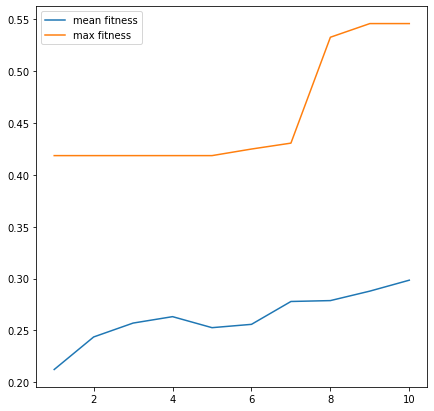


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.5456588524255763
Best individual: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
Iteration: 1
Best fitness: 0.36069497910437714
Iteration: 2
Best fitness: 0.36069497910437714
Iteration: 3
Best fitness: 0.36069497910437714
Iteration: 4
Best fitness: 0.4006056934446441
Iteration: 5
Best fitness: 0.4006056934446441
Iteration: 6
Best fitness: 0.45265184683015286
Iteration: 7
Best fitness: 0.45265184683015286
Iteration: 8
Best fitness: 0.45265184683015286
Iteration: 9
Best fitness: 0.45265184683015286
Iteration: 10
Best fitness: 0.45265184683015286


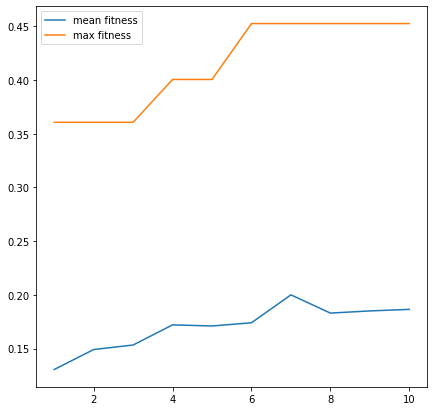


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.45265184683015286
Best individual: [1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.]
Iteration: 1
Best fitness: 0.38524457094507736
Iteration: 2
Best fitness: 0.38524457094507736
Iteration: 3
Best fitness: 0.38524457094507736
Iteration: 4
Best fitness: 0.38524457094507736
Iteration: 5
Best fitness: 0.3861168779022826
Iteration: 6
Best fitness: 0.47357113805140405
Iteration: 7
Best fitness: 0.47357113805140405
Iteration: 8
Best fitness: 0.47357113805140405
Iteration: 9
Best fitness: 0.47357113805140405
Iteration: 10
Best fitness: 0.49131725324023073


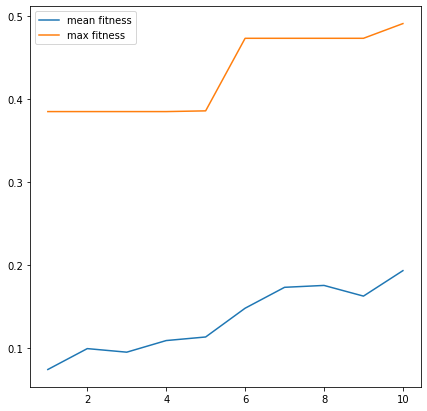


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.49131725324023073
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
Iteration: 1
Best fitness: 0.23485084616684024
Iteration: 2
Best fitness: 0.23485084616684024
Iteration: 3
Best fitness: 0.23485084616684024
Iteration: 4
Best fitness: 0.23485084616684024
Iteration: 5
Best fitness: 0.3010901699288302
Iteration: 6
Best fitness: 0.3410392758912004
Iteration: 7
Best fitness: 0.3410392758912004
Iteration: 8
Best fitness: 0.3539821829935682
Iteration: 9
Best fitness: 0.3539821829935682
Iteration: 10
Best fitness: 0.3541492597957894


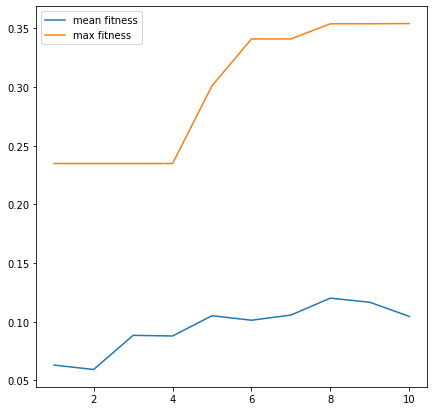


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.3541492597957894
Best individual: [1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
Iteration: 1
Best fitness: 0.21522594849758345
Iteration: 2
Best fitness: 0.21522594849758345
Iteration: 3
Best fitness: 0.22988011410261844
Iteration: 4
Best fitness: 0.3046648420917206
Iteration: 5
Best fitness: 0.3046648420917206
Iteration: 6
Best fitness: 0.3046648420917206
Iteration: 7
Best fitness: 0.3046648420917206
Iteration: 8
Best fitness: 0.3130006142497434
Iteration: 9
Best fitness: 0.3130006142497434
Iteration: 10
Best fitness: 0.3130006142497434


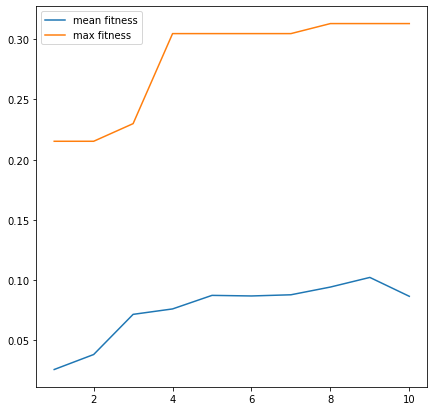


#############################
#			STATS			#
#############################


Total running time: 3 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.3130006142497434
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
Iteration: 1
Best fitness: 0.1275526358249316
Iteration: 2
Best fitness: 0.23216409804473373
Iteration: 3
Best fitness: 0.23639044153003397
Iteration: 4
Best fitness: 0.3012957051807687
Iteration: 5
Best fitness: 0.3090165836880366
Iteration: 6
Best fitness: 0.4135277524328883
Iteration: 7
Best fitness: 0.4135277524328883
Iteration: 8
Best fitness: 0.4135277524328883
Iteration: 9
Best fitness: 0.4135277524328883
Iteration: 10
Best fitness: 0.4135277524328883


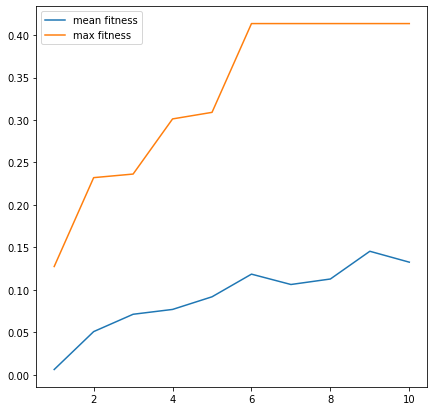


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.4135277524328883
Best individual: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
Iteration: 1
Best fitness: 0.17669955995495923
Iteration: 2
Best fitness: 0.17669955995495923
Iteration: 3
Best fitness: 0.23900800461070154
Iteration: 4
Best fitness: 0.23900800461070154
Iteration: 5
Best fitness: 0.23900800461070154
Iteration: 6
Best fitness: 0.23900800461070154
Iteration: 7
Best fitness: 0.38819093467234034
Iteration: 8
Best fitness: 0.38819093467234034
Iteration: 9
Best fitness: 0.38819093467234034
Iteration: 10
Best fitness: 0.38819093467234034


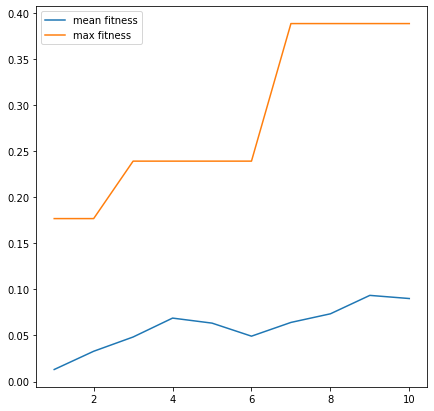


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.38819093467234034
Best individual: [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Iteration: 1
Best fitness: 0.17312707532199376
Iteration: 2
Best fitness: 0.17312707532199376
Iteration: 3
Best fitness: 0.17312707532199376
Iteration: 4
Best fitness: 0.2089829183943581
Iteration: 5
Best fitness: 0.2089829183943581
Iteration: 6
Best fitness: 0.2089829183943581
Iteration: 7
Best fitness: 0.2089829183943581
Iteration: 8
Best fitness: 0.22789991424655495
Iteration: 9
Best fitness: 0.2672662170664228
Iteration: 10
Best fitness: 0.2672662170664228


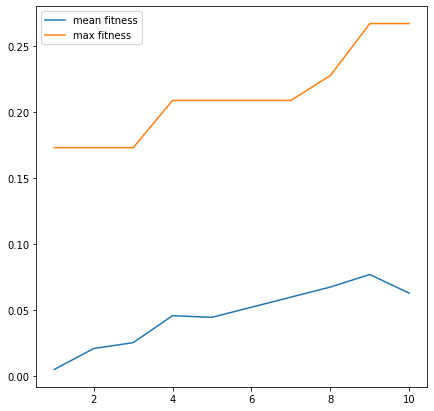


#############################
#			STATS			#
#############################


Total running time: 3 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.2672662170664228
Best individual: [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
Iteration: 1
Best fitness: 0.11021979469181205
Iteration: 2
Best fitness: 0.2000721443293504
Iteration: 3
Best fitness: 0.2000721443293504
Iteration: 4
Best fitness: 0.2000721443293504
Iteration: 5
Best fitness: 0.2000721443293504
Iteration: 6
Best fitness: 0.2000721443293504
Iteration: 7
Best fitness: 0.2000721443293504
Iteration: 8
Best fitness: 0.2000721443293504
Iteration: 9
Best fitness: 0.20088651897263188
Iteration: 10
Best fitness: 0.20088651897263188


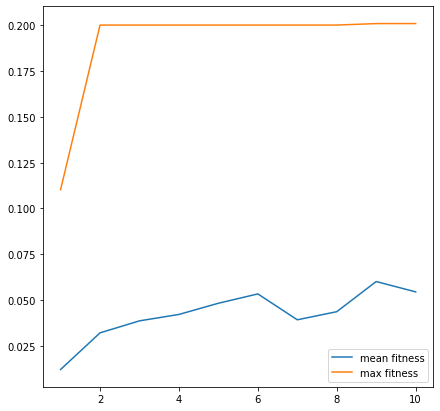


#############################
#			STATS			#
#############################


Total running time: 2 seconds


Population size: 66
Number variables: 22
Selection rate: 0.8
Mutation rate: 0.1
Number Generations: 10

Best fitness: 0.25199988607259804
Best individual: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]


In [90]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(pca.columns))*v_binar[1:len(pca.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = pca.iloc[:,v3]
        else:
            data_df = pca.iloc[:,v2]  
        clust = KMedoids(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(pca.columns),
        fitness_function = silh,
        pop_size = 2*len(pca) , # tamaño de la población (número de individuos)
        max_gen = 10 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

### t-SNE

In [ ]:
tsne = pd.DataFrame(vectors_tsne)

##### -KMEANS

In [ ]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(tsne.columns))*v_binar[1:len(tsne.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = tsne.iloc[:,v3]
        else:
            data_df = tsne.iloc[:,v2]  
        clust = KMeans(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(tsne.columns),
        fitness_function = silh,
        pop_size = 2*len(tsne) , # tamaño de la población (número de individuos)
        max_gen = 3 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

In [ ]:
#####################################

### Stacked autoencoder

In [41]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='selu', input_shape=[original_dimension]),
    tf.keras.layers.Dense(10, activation= 'selu')
])
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='selu'),
    tf.keras.layers.Dense(original_dimension, activation='sigmoid')
])

stacked_ae = tf.keras.models.Sequential([encoder, decoder])
stacked_ae.compile(loss = 'mse', optimizer=tf.keras.optimizers.SGD(lr=0.1))

In [42]:
history = stacked_ae.fit(normalized_df, normalized_df, epochs=20)
codings = encoder.predict(normalized_df)

Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
Train on 33 samples
Epoch 1/20
33/33 [==============================] - 0s 4ms/sample - loss: 1.2506
Epoch 2/20
33/33 [==============================] - 0s 266us/sample - loss: 1.2452
Epoch 3/20
33/33 [==============================] - 0s 280us/sample - loss: 1.2351
Epoch 4/20
33/33 [==============================] - 0s 191us/sample - loss: 1.2266
Epoch 5/20
33/33 [==============================] - ETA: 0s - loss: 1.235 - 0s 214us/sample - loss: 1.2221
Epoch 6/20
33/33 [==============================] - 0s 174us/sample - loss: 1.2156
Epoch 7/20
33/33 [==============================] - 0s 183us/sample - loss: 1.2083
Epoch 8/20
33/33 [==============================] - 0s 181us/sample - loss: 1.1974
Epoch 9/20
33/33 [==============================] - 0s 170us/sample - loss: 1.1922
Epoch 10/20
33/33 [==============================] - 0s 15

In [43]:
stack_auto = pd.DataFrame(codings)

##### -KMEANS

In [104]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(stack_auto.columns))*v_binar[1:len(stack_auto.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = stack_auto.iloc[:,v3]
        else:
            data_df = stack_auto.iloc[:,v2]  
        clust = KMeans(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(stack_auto.columns),
        fitness_function = silh,
        pop_size = 2*len(stack_auto) , # tamaño de la población (número de individuos)
        max_gen = 10 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

Iteration: 1
Best fitness: 0.5901437997817993
Iteration: 2
Best fitness: 0.617408037185669
Iteration: 3
Best fitness: 0.6427596211433411


ValueError: at least one array or dtype is required

In [ ]:
##############################################

### Shared weights autoencoder

In [39]:
shar_auto = pd.DataFrame(codings_1)
shar_auto

,0,1,2,3,4
0,-1.758061,6.762847,-1.758098,22.058577,2.880118
1,-1.144045,7.510919,7.463574,-1.750974,-1.753022
2,0.613836,-1.757931,-1.682398,-1.657860,4.612095
3,8.743696,-1.247476,3.354242,-1.737758,-1.055587
4,6.298399,16.839359,12.698344,-1.756665,-1.758083
5,2.664088,-1.756873,-1.746697,-0.431050,3.546495
6,0.215504,6.065393,13.219347,-1.741498,-1.749677
7,-1.374715,7.113023,13.201324,-1.755332,-1.750356
8,-1.723804,-1.757446,-1.720467,-1.315978,4.466550
9,4.686168,-1.365859,3.905353,-1.738591,-0.848831


##### -KMEANS

In [38]:
for j in range(2,11):
    def silh(v_binar,n_clus = j):
        v = range(1,len(shar_auto.columns))*v_binar[1:len(shar_auto.columns)]
        v2 = v[v != 0]
        if v_binar[0] == 1:
            a=np.array(0)
            v3=np.append(a,v2)
            data_df = shar_auto.iloc[:,v3]
        else:
            data_df = shar_auto.iloc[:,v2]  
        clust = KMeans(n_clusters=n_clus, random_state=42)
        cluster_labels = clust.fit_predict(data_df)
        silhouette_avg = silhouette_score(data_df, cluster_labels)
        return(silhouette_avg)
    solver = BinaryGenAlgSolver(
        n_genes = len(shar_auto.columns),
        fitness_function = silh,
        pop_size = 2*len(shar_auto) , # tamaño de la población (número de individuos)
        max_gen = 3 , # número máximo de generaciones
        mutation_rate = 0.1 , # tasa de mutación para aplicar a la población
        selection_rate = 0.8 , # porcentaje de la población a seleccionar para apareamiento
        selection_strategy = "tournament" , # estrategia a utilizar para la selección. roulette_wheel, random, two_by_two 
    )
    
    solver.solve()

ValueError: at least one array or dtype is required